In [778]:
import pandas as pd
import numpy as np
import tensorflow.keras
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, normalize
import matplotlib.pyplot as plt 
import seaborn as sb

In [779]:
train = pd.read_csv("data/titanic/train.csv")
test = pd.read_csv("data/titanic/test.csv")

In [780]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Encoding

In [781]:
# extract 
train["Title"] = train.apply(lambda row : row.Name.split(" ")[1], axis=1)
test["Title"] = test.apply(lambda row : row.Name.split(" ")[1], axis=1)

In [782]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [783]:
train.drop("Name", axis=1, inplace=True)
test.drop("Name", axis=1, inplace=True)

In [784]:
# test_fe = test.copy()
# train_fe = train.copy()

In [785]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [786]:
def labEnc(data, enc):
    data["Sex"] = enc.fit_transform(data["Sex"].astype("category"))
#     data["Name"] = enc.fit_transform(data["Name"])
    data["Cabin"] = enc.fit_transform(data["Cabin"].astype("str"))
    data["Embarked"] = enc.fit_transform(data["Embarked"].astype("str"))
    data["Ticket"] = enc.fit_transform(data["Ticket"].astype("category"))
    data["Title"] = enc.fit_transform(data["Title"].astype("category"))
    return data

In [787]:
enc = LabelEncoder()
# enc = OneHotEncoder()
train_fe = labEnc(train, enc)
test_fe = labEnc(test, enc)

In [788]:
train_fe.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,22.0,1,0,523,7.2500,147,2,17
1,2,1,1,0,38.0,1,0,596,71.2833,81,0,18
2,3,1,3,0,26.0,0,0,669,7.9250,147,2,14
3,4,1,1,0,35.0,1,0,49,53.1000,55,2,18
4,5,0,3,1,35.0,0,0,472,8.0500,147,2,17


In [789]:
test_fe.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,1,34.5,0,0,152,7.8292,76,1,9
1,893,3,0,47.0,1,0,221,7.0000,76,2,10
2,894,2,1,62.0,0,0,73,9.6875,76,1,9
3,895,3,1,27.0,0,0,147,8.6625,76,2,9
4,896,3,0,22.0,1,1,138,12.2875,76,2,10


### Null

In [790]:
print(train_fe.isnull().values.any())

True


In [791]:
print(train_fe.isnull().sum())
print(test_fe.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Title            0
dtype: int64
PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin           0
Embarked        0
Title           0
dtype: int64


In [792]:
train_fe.Age[train_fe.Age.isnull() == True] = train_fe.Age.median()

In [793]:
print(train_fe.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64


In [794]:
test_fe.Age[test_fe.Age.isnull() == True] = test_fe.Age.median()
test_fe.Fare[test_fe.Fare.isnull() == True] = test_fe.Fare.median()
## group => fare

In [795]:
print(test_fe.isnull().sum())

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64


In [796]:
train_fe.drop("Fare", axis=1, inplace=True)
test_fe.drop("Fare", axis=1, inplace=True)

### labeling

In [797]:
y_train = train_fe['Survived']
X_train = train_fe.drop('Survived', axis=1)

In [798]:
X_train.set_index(['PassengerId'],inplace = True)
test_fe.set_index(['PassengerId'],inplace = True)

In [799]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Title
PassengerId,,,,,,,,,
1,3,1,22.0,1,0,523,147,2,17
2,1,0,38.0,1,0,596,81,0,18
3,3,0,26.0,0,0,669,147,2,14
4,1,0,35.0,1,0,49,55,2,18
5,3,1,35.0,0,0,472,147,2,17


In [800]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Split Test Set

In [801]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, shuffle=True,
                                                    random_state = 2431, test_size=0.2)

In [802]:
X_train.shape, X_test.shape

((712, 9), (179, 9))

### Min Max Scaling

In [741]:
### for numerical
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
X_train_scaled = scale.fit_transform(X_train)
test_scaled = scale.fit_transform(test_fe)

In [742]:
output = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=list(X_train.index.values))
print(output.head())

     Pclass  Sex       Age  SibSp     Parch    Ticket     Cabin  Embarked  \
827     1.0  1.0  0.346569  0.000  0.000000  0.117647  1.000000  0.666667   
383     1.0  1.0  0.396833  0.000  0.000000  0.977941  1.000000  0.666667   
56      0.0  1.0  0.346569  0.000  0.000000  0.138235  0.482993  0.666667   
486     1.0  0.0  0.346569  0.375  0.166667  0.717647  1.000000  0.666667   
4       0.0  0.0  0.434531  0.125  0.000000  0.072059  0.374150  0.666667   

        Title  
827  0.566667  
383  0.566667  
56   0.566667  
486  0.466667  
4    0.600000  


In [743]:
output_test = pd.DataFrame(test_scaled, columns=test.columns, index=list(test.index.values))
print(output_test.head())

     Pclass  Sex       Age  SibSp     Parch    Ticket  Cabin  Embarked  \
892     1.0  1.0  0.452723  0.000  0.000000  0.419890    1.0       0.5   
893     1.0  0.0  0.617566  0.125  0.000000  0.610497    1.0       1.0   
894     0.5  1.0  0.815377  0.000  0.000000  0.201657    1.0       0.5   
895     1.0  1.0  0.353818  0.000  0.000000  0.406077    1.0       1.0   
896     1.0  0.0  0.287881  0.125  0.111111  0.381215    1.0       1.0   

        Title  
892  0.600000  
893  0.666667  
894  0.600000  
895  0.600000  
896  0.666667  


In [744]:
X_train = output.copy()
test_fe = output_test.copy()

### Feature Engineering

In [745]:
# def fe(actual):
    

## Modeling

### Random Forest
https://programmers.co.kr/learn/courses/21/lessons/944

In [746]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

In [747]:
rfClf = RandomForestClassifier()

In [748]:
rfClf.fit(X_train, y_train)

RandomForestClassifier()

In [749]:
estimator = rfClf.estimators_[3]

In [750]:
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X_train.columns,
                class_names = X_train.columns,
                max_depth = 3, # 표현하고 싶은 최대 depth
                precision = 3, # 소수점 표기 자릿수
                filled = True, # class별 color 채우기
                rounded=True, # 박스의 모양을 둥글게
               )

In [751]:
import os
os.getcwd()

'C:\\PycharmProjects\\Kaggle'

In [672]:
# 생성된 .dot 파일을 .png로 변환
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'decistion-tree.png', '-Gdpi=600'])

FileNotFoundError: [WinError 2] 지정된 파일을 찾을 수 없습니다

In [673]:
# jupyter notebook에서 .png 직접 출력
from IPython.display import Image
Image(filename = 'decistion-tree.png')

FileNotFoundError: [Errno 2] No such file or directory: 'decistion-tree.png'

In [702]:
y_pred_rf = rfClf.predict(X_test)

In [703]:
y_pred_rf

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1], dtype=int64)

### Test all
https://www.kaggle.com/makhloufsabir/titanic-survived-classification

In [767]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

print("Logistic Regression:", cross_val_score(LogisticRegression(), X_train, y_train).mean())
print("SVC:", cross_val_score(SVC(), X_train, y_train).mean())
print("Random Forest:", cross_val_score(RandomForestClassifier(), X_train, y_train).mean())
print("GaussianNB:", cross_val_score(GaussianNB(), X_train, y_train).mean())
print("Decision Tree:", cross_val_score(DecisionTreeClassifier(), X_train, y_train).mean())
print("KNeighbors:", cross_val_score(KNeighborsClassifier(), X_train, y_train).mean())
print("MLP:", cross_val_score(MLPClassifier(), X_train, y_train).mean())
print("XGB-TREE:", cross_val_score(XGBClassifier(booster='gbtree'), X_train, y_train).mean())
print("XGB-DART:", cross_val_score(XGBClassifier(booster='dart'), X_train, y_train).mean())

# Logistic Regression: 0.7934797596769428
# SVC: 0.8061262680980992
# Random Forest: 0.8243770314192849
# GaussianNB: 0.7752880921895006
# Decision Tree: 0.7935388555106866
# KNeighbors: 0.7836501526642372
# MLP: 0.8061065694868512
# XGB-TREE: 0.7962671131685216
# XGB-DART: 0.7962671131685216

Logistic Regression: 0.7850684526740864
SVC: 0.794907908992416
Random Forest: 0.7878952033881611
GaussianNB: 0.7766768442824782
Decision Tree: 0.7555697823303457
KNeighbors: 0.7864572047670639
MLP: 0.7878952033881611
XGB-TREE: 0.7892839554811386
XGB-DART: 0.7892839554811386


### XGBOOST
https://www.kaggle.com/bluescrunchie/titanic-survival-prediction-using-xgboost

- Hyperparameter Optimization
    - Random Search
    - Futher reading : AutoML

In [804]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from xgboost import XGBClassifier

search_space = [
  {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.005, 0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': range(3, 10),
    'colsample_bytree': [i/10.0 for i in range(1, 3)],
    'gamma': [i/10.0 for i in range(3)],
  }
]

cv_method = StratifiedKFold(n_splits=5, shuffle = True, random_state=0)
scoring = {'AUC':make_scorer(roc_auc_score)}

In [805]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Title
PassengerId,,,,,,,,,
827,3,1,28.0,0,0,80,147,2,17
383,3,1,32.0,0,0,665,147,2,17
56,1,1,28.0,0,0,94,71,2,17
486,3,0,28.0,3,1,488,147,2,14
4,1,0,35.0,1,0,49,55,2,18
...,...,...,...,...,...,...,...,...,...
76,3,1,25.0,0,0,347,140,2,17
240,2,1,33.0,0,0,636,147,2,17
671,2,0,40.0,1,1,240,147,2,18


In [806]:
optimizer = RandomizedSearchCV(
  estimator = XGBClassifier(),
  param_distributions=search_space,
  cv=cv_method,
  scoring=scoring,
  refit='AUC',
  return_train_score = True,
  verbose=1,
  n_iter = 100,
  n_jobs = 10, 
)

xgb_classifier = optimizer.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    1.1s
[Parallel(n_jobs=10)]: Done 340 tasks      | elapsed:    7.5s
[Parallel(n_jobs=10)]: Done 500 out of 500 | elapsed:   11.6s finished


Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked',
       'Title'],
      dtype='object')
[('Parch', 0.021668779), ('Embarked', 0.023684604), ('Age', 0.030120404), ('SibSp', 0.041874178), ('Cabin', 0.05485538), ('Ticket', 0.08316324), ('Pclass', 0.10488011), ('Title', 0.14974512), ('Sex', 0.49000812)]


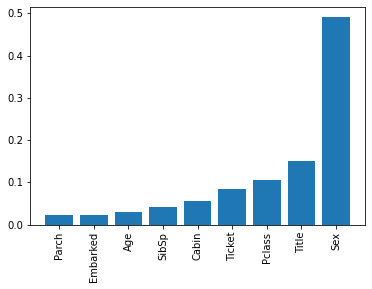

In [807]:
features = X_train.columns
print(features)
imp_dict = {features[i]:optimizer.best_estimator_.feature_importances_[i] for i in range(len(features))}
imp_dict = sorted(imp_dict.items(), key=lambda x: x[1])
print(imp_dict)

plt.bar(*zip(*imp_dict))
plt.xticks(rotation="vertical")
plt.show()

In [808]:
y_pred_xgb = xgb_classifier.predict(X_test)

In [809]:
evaluate(y_test, y_pred_xgb)

Acc :  87.71 

col_0       0   1
Survived         
0         101  13
1           9  56 

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       114
           1       0.81      0.86      0.84        65

    accuracy                           0.88       179
   macro avg       0.86      0.87      0.87       179
weighted avg       0.88      0.88      0.88       179
 



In [810]:
y_sub_xgb = xgb_classifier.predict(test_fe)
print(y_sub_xgb.shape)
pd.DataFrame(y_sub_xgb).head()

(418,)


,0
0,1
1,1
2,1
3,1
4,1


In [815]:
test_fe

# age
# title

,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Title
PassengerId,,,,,,,,,
892,3,1,34.5,0,0,152,76,1,9
893,3,0,47.0,1,0,221,76,2,10
894,2,1,62.0,0,0,73,76,1,9
895,3,1,27.0,0,0,147,76,2,9
896,3,0,22.0,1,1,138,76,2,10
...,...,...,...,...,...,...,...,...,...
1305,3,1,27.0,0,0,267,76,2,9
1306,1,0,39.0,0,0,324,22,0,15
1307,3,1,38.5,0,0,346,76,2,9


In [811]:
sub_index = test.index
print(y_sub.shape, sub_index.shape)
submission = pd.DataFrame({"PassengerId": sub_index, "Survived": y_sub_xgb})

(418,) (418,)


In [812]:
submission

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,1
414,1306,1
415,1307,0
416,1308,1


<AxesSubplot:xlabel='Survived', ylabel='count'>

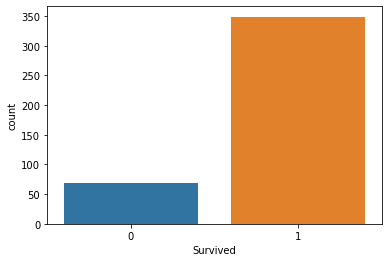

In [814]:
sb.countplot(submission["Survived"])

In [813]:
submission.to_csv("Submission_xgb2.csv", index=False)

### CNN
https://www.tensorflow.org/tutorials/structured_data/feature_columns?hl=ko

In [816]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers

In [817]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
    dataframe = dataframe.copy()
    labels = dataframe.pop('Survived')
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
        ds = ds.batch(batch_size)
    return ds

In [818]:
train_tf, val_tf = train_test_split(train_fe, test_size=0.2)

In [819]:
# batch_size = 5 # 예제를 위해 작은 배치 크기를 사용합니다.
train_ds = df_to_dataset(train_tf, batch_size=batch_size)
val_ds = df_to_dataset(val_tf, batch_size=batch_size)
# test_ds = df_to_dataset(test_fe, shuffle=False, batch_size=batch_size)

In [820]:
# feature_columns = []

# # 수치형 열
# for header in ['Age', 'Fare']:
#     feature_columns.append(feature_column.numeric_column(header))

# # # 버킷형 열
# # age_buckets = feature_column.bucketized_column(age, boundaries=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65])
# # feature_columns.append(age_buckets)

# # 범주형 열
# thal = feature_column.categorical_column_with_vocabulary_list(
#       'thal', ['fixed', 'normal', 'reversible'])
# thal_one_hot = feature_column.indicator_column(thal)
# feature_columns.append(thal_one_hot)

# # 임베딩 열
# thal_embedding = feature_column.embedding_column(thal, dimension=8)
# feature_columns.append(thal_embedding)

# # 교차 특성 열
# crossed_feature = feature_column.crossed_column([age_buckets, thal], hash_bucket_size=1000)
# crossed_feature = feature_column.indicator_column(crossed_feature)
# feature_columns.append(crossed_feature)

In [821]:
cols = list(train.columns)

In [832]:
# cols.remove("Survived")
# cols.remove("PassengerId")
cols.remove("Age")
cols

['Pclass', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Title']

In [833]:
columns = cols
feature_columns = []
for header in columns:
    feature_columns.append(feature_column.numeric_column(header))
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [834]:
feature_columns[0]

NumericColumn(key='Pclass', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)

In [837]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(512, activation='relu'),
  layers.Dense(512, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds,  # tf.data
          validation_data=val_ds,
          epochs=30)

Train for 143 steps, validate for 36 steps
Epoch 1/30
143/143 [==============================] - 1s 6ms/step - loss: 7.1192 - accuracy: 0.5548 - val_loss: 8.9044 - val_accuracy: 0.4022
Epoch 2/30
143/143 [==============================] - 0s 3ms/step - loss: 2.3302 - accuracy: 0.6180 - val_loss: 1.4298 - val_accuracy: 0.6257
Epoch 3/30
143/143 [==============================] - 0s 3ms/step - loss: 1.5867 - accuracy: 0.6081 - val_loss: 1.6749 - val_accuracy: 0.6034
Epoch 4/30
143/143 [==============================] - 0s 3ms/step - loss: 0.9877 - accuracy: 0.6110 - val_loss: 1.1126 - val_accuracy: 0.6704
Epoch 5/30
143/143 [==============================] - 0s 3ms/step - loss: 1.1184 - accuracy: 0.5983 - val_loss: 1.1734 - val_accuracy: 0.5028
Epoch 6/30
143/143 [==============================] - 0s 3ms/step - loss: 0.8259 - accuracy: 0.6320 - val_loss: 0.7951 - val_accuracy: 0.5922
Epoch 7/30
143/143 [==============================] - 0s 3ms/step - loss: 0.8216 - accuracy: 0.6096 - val

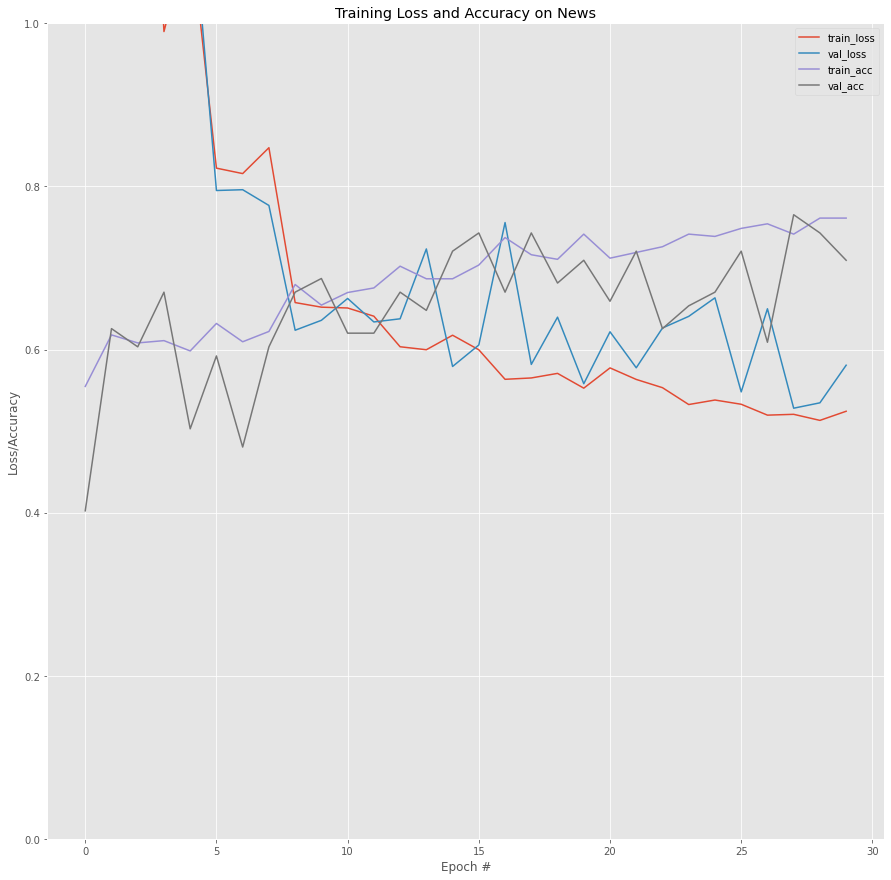

In [842]:
epochs = 30
plt.style.use("ggplot")
plt.figure(figsize=(15,15))
plt.plot(np.arange(0, epochs), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on News")
plt.ylim(0,1)
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

# Evaluation

In [752]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

def evaluate(y_test, y_pred):
    print("Acc : ", accuracy_score(y_test,y_pred).round(4)*100,'\n')
    print(pd.crosstab(y_test,y_pred),'\n')
    print(classification_report(y_test,y_pred),'\n')

In [753]:
evaluate(y_test, y_pred_rf)

Acc :  84.92 

col_0       0   1
Survived         
0         102  12
1          15  50 

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       114
           1       0.81      0.77      0.79        65

    accuracy                           0.85       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179
 



<AxesSubplot:ylabel='count'>

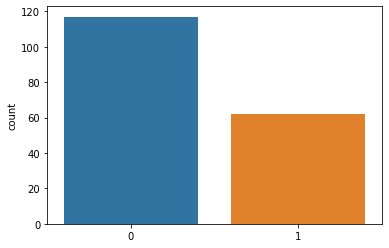

In [754]:
sb.countplot(y_pred_rf)

In [755]:
auc = roc_auc_score(y_test,y_pred_rf)
print('Decision Tree accuarcy : %.2f'% auc)

Decision Tree accuarcy : 0.83


# Submission

In [756]:
test_fe

,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Title
892,1.0,1.0,0.452723,0.000,0.000000,0.419890,1.000000,0.5,0.600000
893,1.0,0.0,0.617566,0.125,0.000000,0.610497,1.000000,1.0,0.666667
894,0.5,1.0,0.815377,0.000,0.000000,0.201657,1.000000,0.5,0.600000
895,1.0,1.0,0.353818,0.000,0.000000,0.406077,1.000000,1.0,0.600000
896,1.0,0.0,0.287881,0.125,0.111111,0.381215,1.000000,1.0,0.666667
...,...,...,...,...,...,...,...,...,...
1305,1.0,1.0,0.353818,0.000,0.000000,0.737569,1.000000,1.0,0.600000
1306,0.0,0.0,0.512066,0.000,0.000000,0.895028,0.289474,0.0,1.000000
1307,1.0,1.0,0.505473,0.000,0.000000,0.955801,1.000000,1.0,0.600000
1308,1.0,1.0,0.353818,0.000,0.000000,0.607735,1.000000,1.0,0.600000


In [757]:
y_sub = rfClf.predict(test_fe)

In [758]:
y_sub = pd.Series(y_sub.astype("int"))

In [759]:
sub_index = test.index

In [760]:
y_sub.shape, sub_index.shape

((418,), (418,))

In [761]:
submission = pd.DataFrame({"PassengerId": sub_index, "Survived": y_sub})

In [762]:
# sub_fin = pd.concat([y_sub, sub_index], axis=1)
# sub_fin.rename(columns={0: "Survived"}, inplace=True)

### Ploting

<AxesSubplot:xlabel='Survived', ylabel='count'>

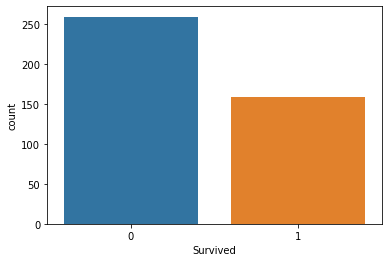

In [763]:
sb.countplot(submission["Survived"])

In [764]:
cm = confusion_matrix(y_test, y_pred_rf)
cm

array([[102,  12],
       [ 15,  50]], dtype=int64)

<AxesSubplot:>

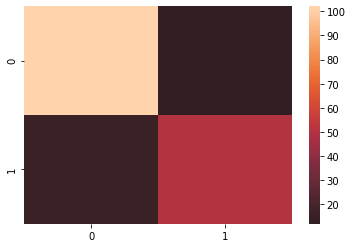

In [765]:
sb.heatmap(cm, center=True)

### SAVE

In [766]:
submission.to_csv("Submission.csv", index=False)